# 911 Calls Capstone Project

## Introduction
In this capstone project, we analyze 911 call data from Kaggle to understand various aspects of emergency calls. The dataset contains information about call locations, descriptions, types, and timestamps.

## Data and Setup

**Import necessary libraries:**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read in the CSV file as a DataFrame:**

In [3]:
df = pd.read_csv('911.csv')


**Check the info of the DataFrame:**

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**View the first few rows of the DataFrame:**

In [5]:
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

1. What are the top 5 zipcodes for 911 calls?

In [6]:
df['zip'].value_counts().head(5)


zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

2. What are the top 5 townships (twp) for 911 calls?

In [7]:
df['twp'].value_counts().head()


twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

3. How many unique title codes are there in the 'title' column?

In [8]:
df['title'].nunique()


110

## Creating New Features

1. Create a new column "Reason" based on the 'title' column:


In [9]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

2. What is the most common Reason for a 911 call?

In [10]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

3. Create a countplot of 911 calls by Reason using seaborn:

<Axes: xlabel='Reason', ylabel='count'>

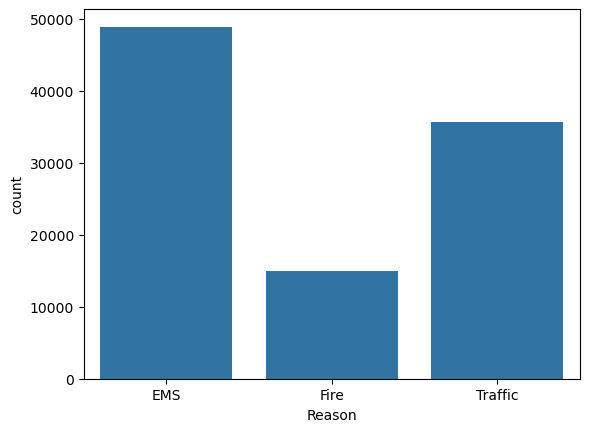

In [13]:
sns.countplot(x='Reason', data=df)

## Time Information Analysis

1. Check the data type of the 'timeStamp' column:

In [14]:
type(df['timeStamp'].iloc[0])

str

2. Convert the 'timeStamp' column from strings to DateTime objects:


In [15]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

3. Create new columns for Hour, Month, and Day of Week from 'timeStamp':


In [16]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

4. Map the integer day of the week to string names:

In [19]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

5. Create a countplot of the Day of Week column with hue based on the Reason column:

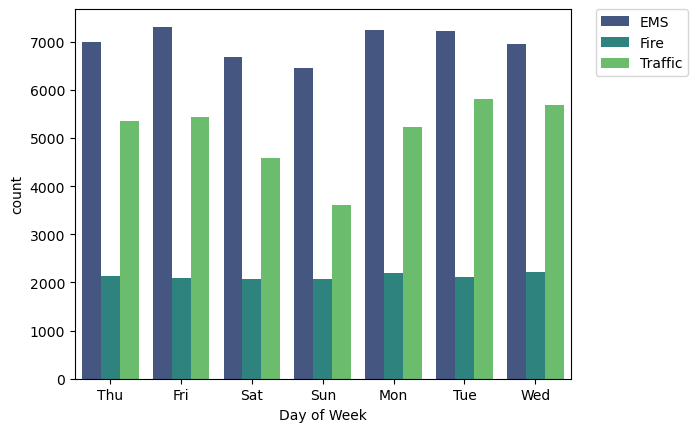

In [18]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

6. Create a countplot of the Month column with hue based on the Reason column:

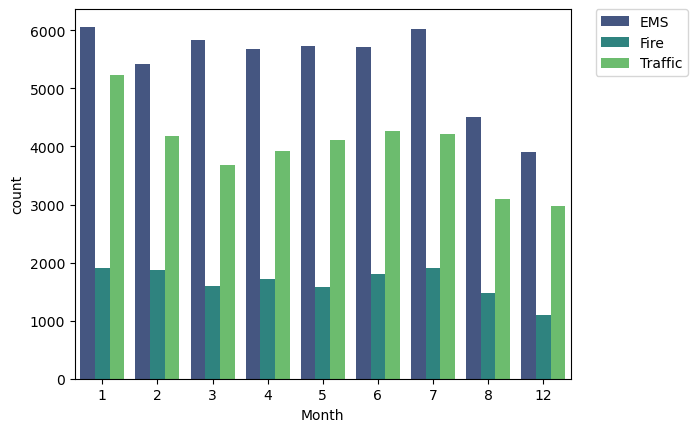

In [16]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Monthly Trends

1. Create a groupby object 'byMonth' and plot the count of calls per month:



<Axes: xlabel='Month'>

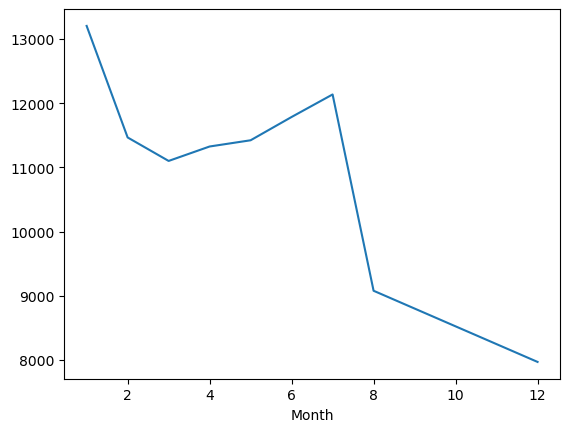

In [17]:
byMonth = df.groupby('Month').count()
byMonth['lat'].plot()

2. Use seaborn's lmplot to create a linear fit on the number of calls per month:




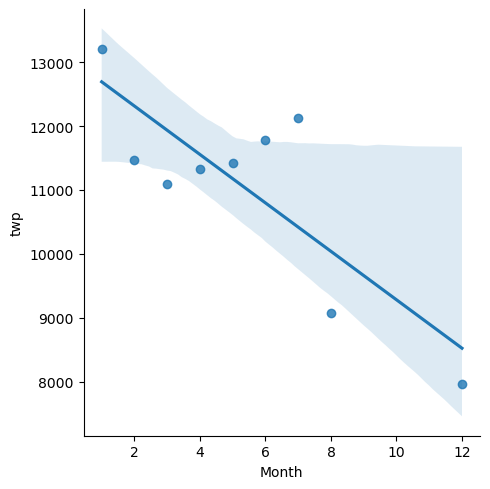

In [18]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

## Daily Trends

1. Create a new column 'Date' that contains the date from the 'timeStamp' column:

In [19]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())

2. Group by 'Date' and plot counts of 911 calls:

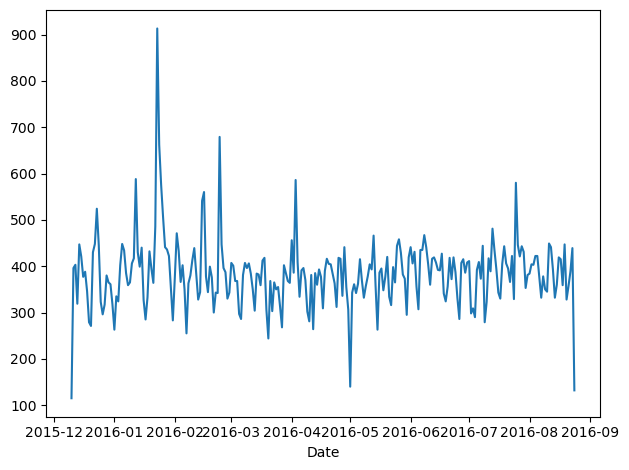

In [20]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

3. Create separate plots for each Reason:

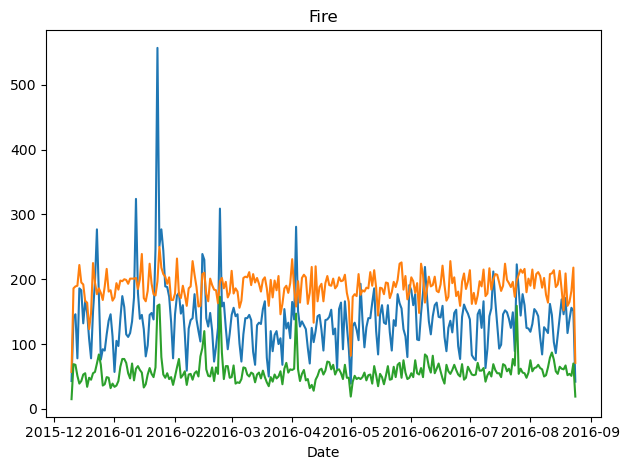

In [21]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

## Heatmaps and Clustermaps

1. Create a heatmap of calls by Day of the Week and Hour:

<Axes: xlabel='Hour', ylabel='Day of Week'>

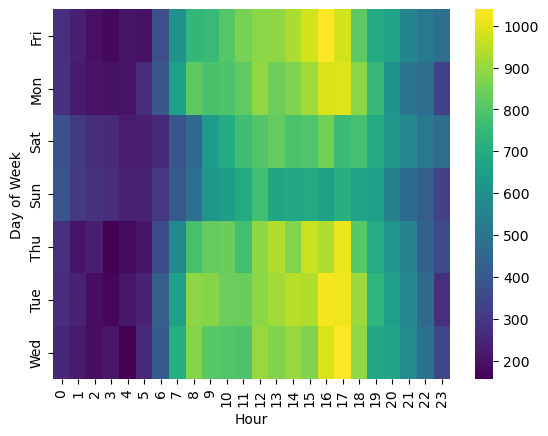

In [22]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
sns.heatmap(dayHour, cmap='viridis')

2. Create a clustermap of calls by Day of the Week and Hour:

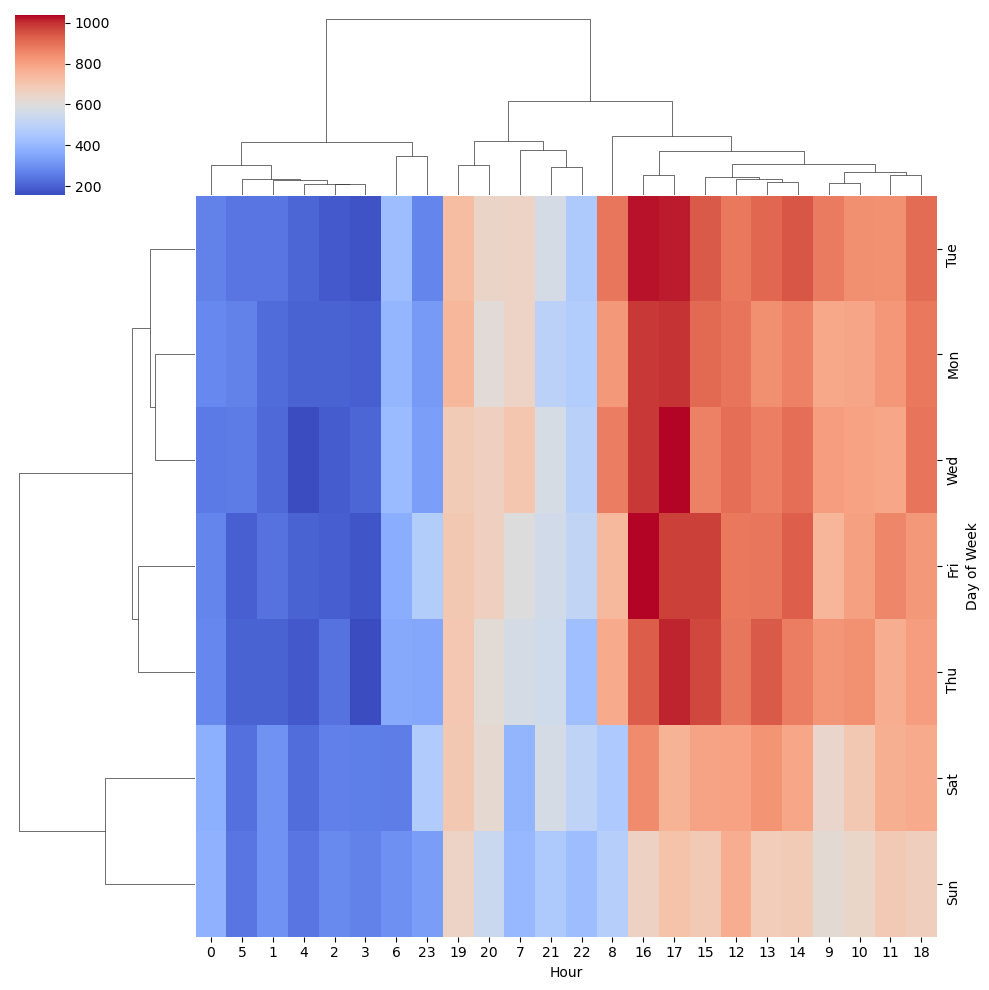

In [23]:
sns.clustermap(dayHour, cmap='coolwarm')

3. Create a heatmap and clustermap of calls by Day of the Week and Month:


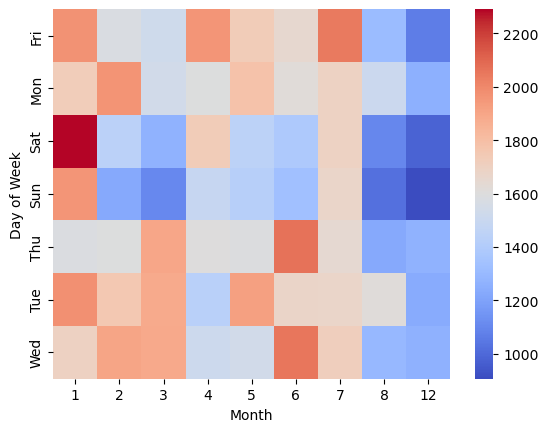

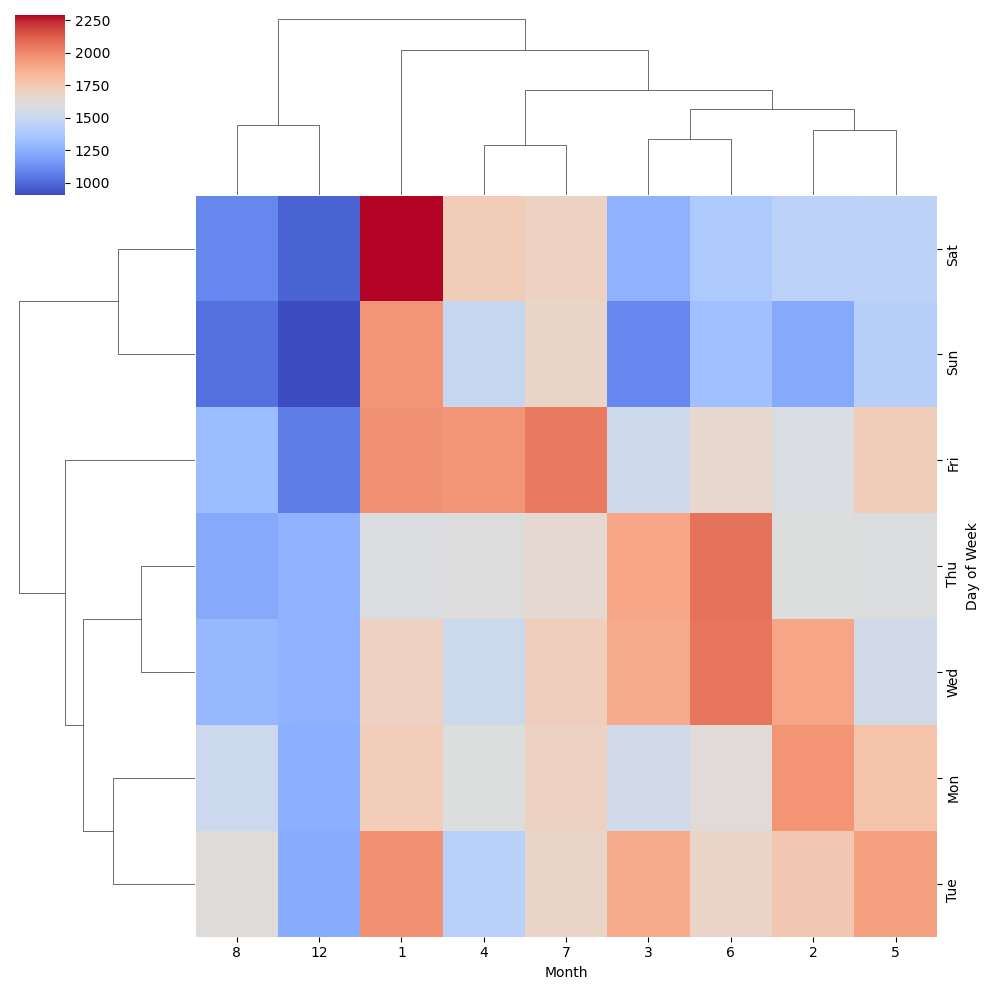

In [24]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
sns.heatmap(dayMonth, cmap='coolwarm')
sns.clustermap(dayMonth, cmap='coolwarm')


## Conclusion

In this project, we explored the 911 call dataset to understand call distribution across various dimensions such as zip codes, townships, reasons, and time. We utilized data manipulation and visualization techniques to gain insights into emergency call patterns.

Great Job! 🎉